**Companion sheet to the youtube video**
---

**[Finding new draft synergies with 17lands and python!](https://www.youtube.com/channel/UCsQeG2OvXvPCpwjTe5T2K-g)**
---
---

First, lets import the libraries we'll use.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np

Let's go ahead and read the 17lands data from our file. It's important that the data file is in the same folder as our jupyter notebook.

In [2]:
f = 'game_data_public.MID.PremierDraft.csv'
sdf = pd.read_csv(f)
print(f'Number of games: {len(sdf)}')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of games: 653944


Let's look at the columns in our "excel sheet".

In [3]:
n_columns = len(sdf.columns)
print(f'Number of columns: {n_columns}')
column_headings = list(sdf.columns)
print(f'Columns headings: {column_headings}')

Number of columns: 1106
Columns headings: ['user_win_rate_bucket', 'user_n_games_bucket', 'draft_id', 'build_index', 'draft_time', 'expansion', 'event_type', 'game_number', 'rank', 'opp_rank', 'main_colors', 'splash_colors', 'on_play', 'num_mulligans', 'opp_num_mulligans', 'opp_colors', 'num_turns', 'won', 'opening_hand_Abandon the Post', 'opening_hand_Adeline, Resplendent Cathar', 'opening_hand_Ambitious Farmhand', 'opening_hand_Angelfire Ignition', 'opening_hand_Arcane Infusion', 'opening_hand_Ardent Elementalist', "opening_hand_Arlinn, the Pack's Hope", 'opening_hand_Arrogant Outlaw', 'opening_hand_Augur of Autumn', 'opening_hand_Baithook Angler', 'opening_hand_Baneblade Scoundrel', 'opening_hand_Bat Whisperer', 'opening_hand_Beloved Beggar', 'opening_hand_Bereaved Survivor', 'opening_hand_Bird Admirer', 'opening_hand_Bladebrand', 'opening_hand_Bladestitched Skaab', 'opening_hand_Blessed Defiance', 'opening_hand_Blood Pact', 'opening_hand_Bloodline Culling', 'opening_hand_Bloodthirs

In [4]:
sdf = sdf.head(300000)
print(f'New dataframe length: {len(sdf)}')

New dataframe length: 300000


Let's only look at the commons and uncommons, and ignore the rares. This isn't VOW, after all...

In [5]:
commons = ['Consider', 'Cathar Commando', 'Otherworldly Gaze', 'Blood Pact', 'Return to Nature', "Jack-o'-Lantern", 'Lunarch Veteran', 'Ardent Elementalist', 'Evolving Wilds', 'Larder Zombie', 'Unblinking Observer', 'Duress', 'Raze the Effigy', 'Geistwave', "Moonrager's Slash", "Pack's Betrayal", 'Voldaren Stinger', 'Candletrap', 'Famished Foragers', 'Flip the Switch', 'Morkrut Behemoth', 'No Way Out', 'Rotten Reunion', 'Stolen Vitality', 'Snarling Wolf', 'Secrets of the Key', 'Hobbling Zombie', 'Startle', 'Falkenrath Perforator', 'Bird Admirer', 'Bladebrand', 'Blessed Defiance', 'Revenge of the Drowned', 'Crawl from the Cellar', 'Lambholt Harrier', "Neonate's Rush", 'Bounding Wolf', 'Might of the Old Ways', 'Defenestrate', 'Siege Zombie', 'Immolation', 'Diregraf Horde', 'Duel for Dominance', 'Search Party Captain', 'Vampire Interloper', 'Burn the Accursed', 'Electric Revelation', 'Mounted Dreadknight', 'Tapping at the Window', 'Tireless Hauler', 'Unruly Mob', 'Festival Crasher', 'Howl of the Hunt', 'Pestilent Wolf', 'Candlelit Cavalry', 'Baithook Angler', 'Stormrider Spirit', 'Brimstone Vandal', 'Arrogant Outlaw', 'Dawnhart Rejuvenator', 'Candlegrove Witch', 'Celestus Sanctifier', 'Ritual Guardian', 'Sungold Barrage', "Hedgewitch's Mask", 'Locked in the Cemetery', 'Stuffed Bear', 'Flare of Faith', 'Thraben Exorcism', 'Organ Hoarder', 'Gavony Silversmith', 'Gavony Trapper', 'Homestead Courage', 'Soul-Guide Gryff', 'Mourning Patrol', 'Clarion Cathars', 'Component Collector', 'Devious Cover-Up', 'Drownyard Amalgam', 'Falcon Abomination', 'Shipwreck Sifters', 'Bat Whisperer', 'Novice Occultist', "Olivia's Midnight Ambush", 'Abandon the Post', 'Bramble Armor', 'Eccentric Farmer', 'Harvesttide Sentry', 'Path to the Festival', 'Plummet', 'Shadowbeast Sighting', 'Timberland Guide', 'Crossroads Candleguide', 'Silver Bolt', 'Galedrifter', 'Ecstatic Awakener', 'Shady Traveler', 'Harvesttide Infiltrator', 'Tavern Ruffian']
uncommons = ['Faithful Mending', 'Infernal Grasp', 'Moonsilver Key', 'Sunset Revelry', 'Morbid Opportunist', 'Play with Fire', 'Vampire Socialite', 'Outland Liberator', 'Delver of Secrets', 'Kessig Naturalist', 'Field of Ruin', 'Fading Hope', 'Cathartic Pyre', 'Bladestitched Skaab', 'Join the Dance', 'Village Watch', 'Ominous Roost', 'Heirloom Mirror', 'Thermo-Alchemist', 'Flame Channeler', 'Dissipate', 'Gavony Dawnguard', 'Lunar Frenzy', 'Ghoulish Procession', 'Diregraf Rebirth', 'Fleshtaker', 'Corpse Cobble', 'Chaplain of Alms', 'Ambitious Farmhand', 'Mystic Skull', 'Overwhelmed Archivist', 'Borrowed Time', "Dryad's Revival", 'Rootcoil Creeper', 'Spellrune Painter', 'Rite of Oblivion', 'Bereaved Survivor', 'Hound Tamer', 'Unnatural Moonrise', 'Deathbonnet Sprout', 'Contortionist Troupe', 'Devoted Grafkeeper', 'Voldaren Ambusher', 'Burly Breaker', 'Hungry for More', 'Necrosynthesis', 'Fangblade Brigand', 'Dreadhound', 'Vengeful Strangler', 'Stromkirk Bloodthief', 'Arcane Infusion', 'Turn the Earth', 'Purifying Dragon', 'Covert Cutpurse', 'Sacred Fire', 'Vivisection', 'Storm Skreelix', 'Beloved Beggar', 'Baneblade Scoundrel', 'Sunrise Cavalier', 'Foul Play', 'Defend the Celestus', 'Winterthorn Blessing', 'Clear Shot', 'Seize the Storm', 'Dawnhart Wardens', 'Nebelgast Intruder', 'Mysterious Tome', 'Loyal Gryff', 'Grizzly Ghoul', 'Ritual of Hope', 'Rise of the Ants', 'Covetous Castaway', "Odric's Outrider", 'Dawnhart Mentor', 'Skaab Wrangler', 'Brood Weaver', 'Phantom Carriage', 'Firmament Sage', 'Bloodtithe Collector', 'Obsessive Astronomer', "Cathar's Call", 'Duelcraft Trainer']
nonrares = commons + uncommons

Now, lets look at the GIH win rates conditional on a certain card being in the deck.

In [29]:
synergy_card = "Ominous Roost"
synergy_number = 2
min_sample_size = 100

In [30]:
GIH_wr = []
GIH_wr_syn = []
GIH_names = []
n_GIH_syn = []
for name in nonrares:
    sdf_GIH = sdf[(sdf["opening_hand_"+name]+sdf["drawn_"+name])>0]
    sdf_GIH_syn = sdf[((sdf["opening_hand_"+name]+sdf["drawn_"+name])>0) & (sdf["deck_"+synergy_card]>=synergy_number)]
    if len(sdf_GIH_syn)>min_sample_size:
        GIH_wr.append(len(sdf_GIH[sdf_GIH["won"]==True])/len(sdf_GIH))
        GIH_wr_syn.append(len(sdf_GIH_syn[sdf_GIH_syn["won"]==True])/len(sdf_GIH_syn))
        GIH_names.append(name)
        n_GIH_syn.append(len(sdf_GIH_syn))
plotdf = pd.DataFrame(list(zip(GIH_wr,GIH_wr_syn,n_GIH_syn)),columns=('GIH_wr','GIH_wr_syn','n_GIH_syn'))
plotdf.index = GIH_names

Now let's make some plots!

<IPython.core.display.Javascript object>


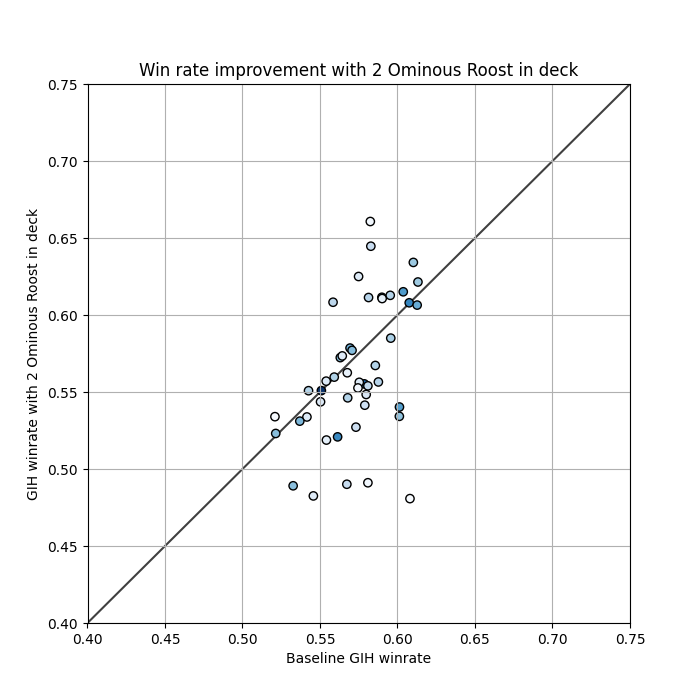

(0.4, 0.75)

In [31]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
x = plotdf['GIH_wr']
y = plotdf['GIH_wr_syn']
tt = plotdf.index
n_GIH = plotdf["n_GIH_syn"]
sc = plt.scatter(x,y,c=np.log(n_GIH),cmap='Blues',edgecolor='black')
plt.grid()
nn = plt.xticks(np.arange(0.4, 0.8, step=0.05))
nn = plt.yticks(np.arange(0.4, 0.8, step=0.05))
nn = ax.title.set_text(f'Win rate improvement with {synergy_number} {synergy_card} in deck')
nn = ax.set_xlabel('Baseline GIH winrate')
nn = ax.set_ylabel(f'GIH winrate with {synergy_number} {synergy_card} in deck')
lims = [ np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()]) ]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)

And some extra code to make the plot interactive...

In [32]:
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points",backgroundcolor='white')
annot.set_visible(False)

def hover(event):
    if event.inaxes == ax:        
        cont, ind = sc.contains(event)
        if cont:
            annot.xy = (event.xdata, event.ydata)
            annot.set_text("{}".format('\n'.join([f'{tt[i]}, n={n_GIH[i]}' for i in ind["ind"]])))
            annot.set_visible(True)    
        else:
            annot.set_visible(False)
nn = fig.canvas.mpl_connect("motion_notify_event", hover)
